**What should be included: Answers to all questions, as
well as the proof that Jacobi converges for this problem, the Jacobi-method code, and the
plot showing the unsatisfactory solution for few iterations with N = 5.**

# Lab 5 - Part 3

> Implement a python function for the Jacobi-method in your code from Lab 5, part 2. The function should take the matrix $A$ ，the right-hand side, an integer number being the number of iterations (note, we are not using a more advanced stopping criteria here), and an initial guess $L_0$ ，and return the solution $L_k$ .Hints: You can create the diagonal matrix D like this $D=$ `np.diagflat(np.diag(A))`. Other useful python functions are `numpy.tril(), numpy.triu()` and `numpy.matmul()`. Note that `numpy.tril()` and `numpy.triu()` includes the diagnoal of the original matrix, so for your purposes you need to subtract $D$ . Include the code in your hand in.
> 
> Use your function for solving the ODE-BVP from Lab 5 part 2, for N=5 and a maximum number of iterations equal to 100. Make sure that the result is close to the analytical solution (e.g. by looking at your plot). 
> 
> Decrease the number of Jacobi iterations until you can see in the plot that the solution is less accurate. How few iterations did you use? Include the plot in your hand in. 
> 
> Set N=10 instead. Do you need more iterations for the solution to be acceptable? How many? Note: It is possible to prove that the number of iterations depend on $N$

We have according to the method:
- $M=D$ where $D$ is the diagonal matrix of $A$, so simply fetch the diagonal of $A$
- $K = L + U$ where $L$ is the lower triangular part of $A$ and $U$ is the upper triangular part of $A$
- $-L, -U$ strictly lower and upper triangular parts of $A$ respectively
Can then write 
$$
x_k = D^{-1} (L + U)x_{k-1} + D^{-1}b
$$

The function will take $A$, $b$, $N$ and $L_0$ as input and return the solution $L_k$ after $N$ iterations.

We have 
$$
A=\left[\begin{array}{ccc}
2 & -1 & 1 \\
1 & -2 & 1 \\
2 & 1 & -4
\end{array}\right]
$$


In [58]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import time
from scipy.linalg import lu_factor, lu_solve


def assemble_A(N):
    h = (pi / 2) / (N + 1)
    A = np.zeros((N, N)) # Coefficient matrix of NxN dimension

    # main diag
    np.fill_diagonal(A, -2 + h**2)

    # sub diag, super diag
    # A[i, i-1] = 1 for i = 1 to N-1
    A[1:, :-1][np.eye(N-1, dtype=bool)] = 1
    # A[i, i+1] = 1 for i = 0 to N-2
    A[:-1, 1:][np.eye(N-1, dtype=bool)] = 1

    return A



def assemble_F(N, leftbc, rightbc):
    F = np.zeros(N)

    F[0] = -leftbc

    F[N - 1] = -rightbc
    return F




In [59]:
def jacobi_method(A, b, x0, max_iterations):
    # x0 is the initial guess (vector)
    D = np.diagflat(np.diag(A))
    D_inv = np.linalg.inv(D)
    
    # Off-diagonal part: A - D = L_strict + U_strict
    LU_strict = A - D
    
    x_k = np.copy(x0) # Initialize x_k with the initial guess
    
    for k in range(max_iterations):
        # x_k_new = D_inv @ (b - LU_strict @ x_k)
        x_k = D_inv @ (b - LU_strict @ x_k) # Update x_k directly
        
    return x_k

In [60]:
def ComputeAnalyticalSolution(N, leftbc, rightbc):
    x = np.linspace(0, (pi / 2), N + 2)
    y = np.cos(x) + 2* np.sin(x)
    return x, y

In [61]:
def ComputeNumericalSolution(N, leftbc, rightbc, M):
    h = (pi / 2) / (N + 1)
    x = np.linspace(0, (pi / 2), N + 2)
    A = np.zeros((N, N)) # Coefficient matrix of nxn dimension
    F = np.zeros(N) # The result vector such that AU = F of size n
    # make initial a matrix of ones
    L0 = np.ones(N)
    A[0, 0] = -2 + h**2
    A[0, 1] = 1
    F[0] = -leftbc
    for i in range(1, N - 1):
        A[i, i - 1] = 1
        A[i, i] = -2 + h**2
        A[i, i + 1] = 1
        F[i] = 0
    A[N - 1, N - 2] = 1
    A[N - 1, N - 1] = -2 + h**2
    F[N - 1] = -rightbc

    y_h_int = jacobi_method(A, F, L0, M)
    y_h = np.zeros(N + 2)
    y_h[0] = leftbc
    y_h[1:N + 1] = y_h_int
    y_h[-1] = rightbc
    return x, y_h, h

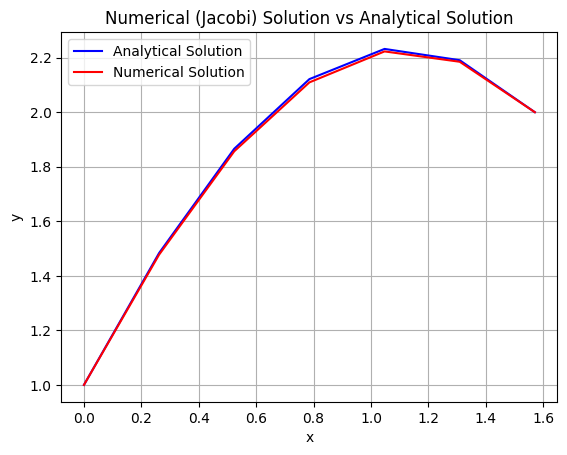

In [62]:
N = 5 # Number of intervals
M = 40 # Number of iterations

L0 = np.ones(N) # Initial guess vector
max_jacobi_iterations = 100 # Use 100 iterations initially

x = np.linspace(0, (pi / 2), N + 2)
leftbc = 1
rightbc = 2
y = np.cos(x) + 2* np.sin(x)

x_h, y_h, h = ComputeNumericalSolution(N, leftbc, rightbc, M)

# plot analytical and numerical 
plt.plot(x, y, label='Analytical Solution', color='blue')
plt.plot(x_h, y_h, label='Numerical Solution', color='red')
plt.title('Numerical (Jacobi) Solution vs Analytical Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

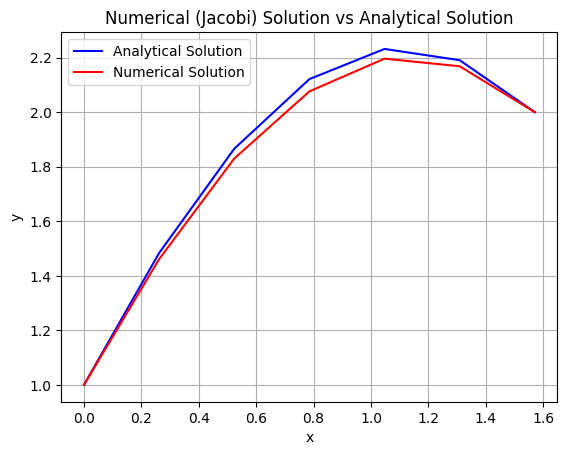

In [63]:
N = 5
M = 30

L0 = np.ones(N) # Initial guess vector
max_jacobi_iterations = 100 # Use 100 iterations initially

x = np.linspace(0, (pi / 2), N + 2)
leftbc = 1
rightbc = 2
y = np.cos(x) + 2* np.sin(x)

x_h, y_h, h = ComputeNumericalSolution(N, leftbc, rightbc, M)

# plot analytical and numerical 
plt.plot(x, y, label='Analytical Solution', color='blue')
plt.plot(x_h, y_h, label='Numerical Solution', color='red')
plt.title('Numerical (Jacobi) Solution vs Analytical Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

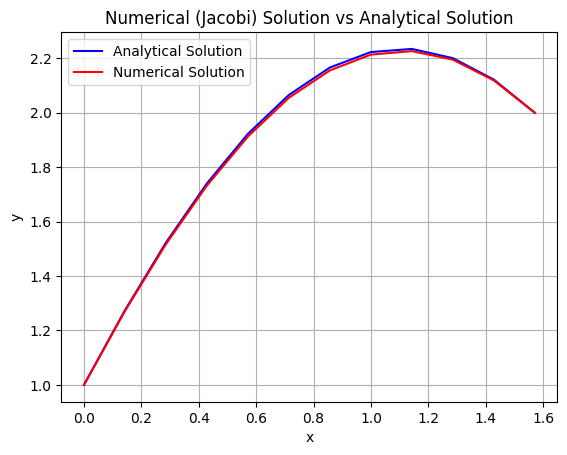

In [64]:
N = 10
M = 150

L0 = np.ones(N) # Initial guess vector
max_jacobi_iterations = 100 # Use 100 iterations initially

x = np.linspace(0, (pi / 2), N + 2)
leftbc = 1
rightbc = 2
y = np.cos(x) + 2* np.sin(x)

x_h, y_h, h = ComputeNumericalSolution(N, leftbc, rightbc, M)

# plot analytical and numerical 
plt.plot(x, y, label='Analytical Solution', color='blue')
plt.plot(x_h, y_h, label='Numerical Solution', color='red')
plt.title('Numerical (Jacobi) Solution vs Analytical Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()